# Compare AE algorithms on pure probability

To compare the performance of Amplitude Estimation (**AE**) algorithms we have developed the module **benchmark.compare_ae_probability.probabiliy_estimation.py**. In this module, a pre-defined **Black Scholes** probability density in an input domain is loaded in a Quantum state and the probability of a fixed input state can be obtained using the different **AE** algorithms, developed in the **QQuantLib.AE** package.

In [ ]:
import sys
sys.path.append("../../")

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qat.lang.AQASM as qlm
#This cell loads the QLM solver. QPU = [qlmass, python, c]
from QQuantLib.qpu.get_qpu import get_qpu
from QQuantLib.utils.benchmark_utils import combination_for_list
QPU = ["qlmass", "python", "c"]
linalg_qpu = get_qpu(QPU[2])

In [ ]:
%matplotlib inline

## 1. Domain of Probability density function.

The domain where the probability density function will be defined can be configurated using a Python dictionary with the following keys:

* *x0* : domain initial point.
* *xf* : domain ending point.
* *n_qbits* : number of qubits for discretizing the interval (2^n_qubits bins intervals will be used for discretizing the domain)

This dictionary can be provided as a JSON file. The *jsons/domain_configuration.json* file shows an example of a domain configuration dictionary.

The *get_domain* from **probability_estimation** module creates the corresponding domain in *numpy* array format.


In [ ]:
folder = "./jsons/"

with open(folder+"domain_configuration.json") as json_file:
    domain_cfg = json.load(json_file)
conf_domain = combination_for_list(domain_cfg)[0]

In [ ]:
# COnfiguration for the domain
print(conf_domain)

In [ ]:
from probability_estimation import get_domain

In [ ]:
domain, n_qbits = get_domain(**conf_domain)
print("n_qbits: {}".format(n_qbits))
print(domain)

## 2. Probability density Configuration

The probability density function we are going to use is a **Black-Scholes** one (which has the form of a log-normal distribution).  For configuring it a Python dictionary with the following parameters will be used:

* *s_0*: this is the value of the asset, modelled by the **Black-Scholes** probability density.
* *risk_free_rate*:  risk-free rate of the market, mandatory input of the **Black-Scholes** probability density.
* *maturity*:  time when we want to compute the the **Black-Scholes** probability density.
* *volatility*: volatility of the asset,  mandatory input of the **Black-Scholes** probability density.

This dictionary can be provided as a JSON file. The *jsons/density_probability.json* file shows an example of a possible probability density configuration.

The *get_probability_density* function, from **probabiliy_estimation** module, creates the numpy array with the **Black-Scholes** probability density. The mandatory inputs are the configuration dictionary for the probability density and the desired domain provided as a numpy 

In [ ]:
from probability_estimation import get_probability_density

In [ ]:
with open(folder+"density_probability.json") as json_file:
    density_cfg = json.load(json_file)
conf_density = combination_for_list(density_cfg)[0]

In [ ]:
# Configuration for the probability density
print(conf_density)

In [ ]:
p_x = get_probability_density(domain, **conf_density)

In [ ]:
# For example we want the probability of the bin 21
state = 21
plt.plot(domain, p_x, 'o')
plt.axhline(p_x[state])

## 3. Amplitude Estimation algorithm selection and configuration.

The main idea is to load this probability density in a quantum circuit and estimate the amplitude of a desired state (for example the corresponding state to interval 21, using  different **AE** algorithms. Then we can use this code to evaluate the performance of different **AE** algorithms.

We need to provide the **AE** algorithm and its corresponding configuration. A Python configuration with the following format is used for selecting and configuring the **AE** algorithm:

* *ae_type*: string with the AE algorithm. Valid strings are the same that the provided ones for the **AE** class of module **QQuantLib/AE/ae_class**
    * see FinancialApplications/misc/notebooks/08_AmplitudeEstimation_Class.ipynb
* *schedule*: list of 2 lists with the schedule for the **MLAE** algorithm 
    * see misc/notebooks/03_Maximum_Likelihood_Amplitude_Estimation_Class.ipynb
* *delta*: configuration of the delta for the brute-force optimizer when used **MLAE** algorithm 
    * see misc/notebooks/03_Maximum_Likelihood_Amplitude_Estimation_Class.ipynb
* *ns*: number of samples for brute-force optimizer when used **MLAE** algorithm 
    * see misc/notebooks/03_Maximum_Likelihood_Amplitude_Estimation_Class.ipynb
* *auxiliar_qbits_number*: number of auxiliar qubits used for **CQPEAE** algorithms.
    * see misc/notebooks/04_Classical_Phase_Estimation_Class.ipynb
* *cbits_number*: number fo classical bits used in **IQPAE** algorithm.
    * see misc/notebooks/05_Iterative_Quantum_Phase_Estimation_Class.ipynb
* *epsilon*: desired epsilon (semi-diference between lower and higher bounds) in different **AE** algorithms like **IQAE** (or **mIQAE**) or **RQAE** and their variants
    * see misc/notebooks/06_Iterative_Quantum_Amplitude_Estimation_class.ipynb
    * see misc/notebooks/07_Real_Quantum_Amplitude_Estimation_class.ipynb
    * see misc/notebooks/07-02_Improvements_on_Real_Quantum_Amplitude_Estimation.ipynb
* *alpha*: Failure probability for **IQAE** type algorithms.
    * see misc/notebooks/06_Iterative_Quantum_Amplitude_Estimation_class.ipynb
* *shots*: number of shots used. It can be applied for different **AE** algorithms like **CQPEAE**, **IQPEAE**, **IQAE**, **mIQAE** or **sIQAE**
* *gamma*: Failure probability for **RQAE** type algorithms.
    * see misc/notebooks/07_Real_Quantum_Amplitude_Estimation_class.ipynb
    * see misc/notebooks/07-02_Improvements_on_Real_Quantum_Amplitude_Estimation.ipynb
* *q*: Amplification factor for **RQAE** algorithms
    * see misc/notebooks/07_Real_Quantum_Amplitude_Estimation_class.ipynb
    * see misc/notebooks/07-02_Improvements_on_Real_Quantum_Amplitude_Estimation.ipynb
* *erqae_schedule* : dictionary for configuring the scheduling of the **eRQAE** algorithm.
    * see misc/notebooks/07-02_Improvements_on_Real_Quantum_Amplitude_Estimation.ipynb
* *multiplexor*: Boolean. If True Shende multiplexors instead of brute-force implementations of Rotations controlled by state are used.
* mcz_qlm*: Boolean. If True multicontrolled Z mandatory for Grover operator will be built using QLM syntax. If False we use a multiplexor implementation.

This dictionary can be provided as a JSON file. The *jsons/ae_configuration.json* file shows an example of a possible **AE** configuration.


In [ ]:
# Configuration for MLAE
with open(folder+"ae_configuration_mlae.json") as json_file:
    ae_cfg = json.load(json_file)
ae_solver = combination_for_list(ae_cfg)[0]

In [ ]:
ae_solver

## 4. Complete Problem

The complete AE problem is executed by the function *get_amplitude_estimation* from **probabiliy_estimation** module. The workflow is the following:

1. Configure the domain array from the domain configuration Python dictionary.
2. Configure the probability density array from the probability density configuration Python dictionary and the domain computed in step 1.
3. Select and configure the **AE** algorithm from the corresponding Python dictionary.
4. Create the quantum circuit that loads the probability density array computed in step 2 into the amplitudes of the quantum state (we use the *load_probability* function from **QQuantLib.DL.data_loading** module).
5. Provide the quantum circuit as the oracle of the **AE** algorithm (selected and configured in step 4). Additionally, the desired state should be provided to the **AE** algorithm.
6. Run the **AE** algorithm properly configured. The **AE** will return the estimation of the desired state.
7. Post-process the results and return a pandas DataFrame with all the complete information


The input of the *get_amplitude_estimation* function will be a big Python dictionary with the 3 different mandatory dictionaries: the domain, the  probability density and the **AE** selection and configuration ones. 

In addition to this big input dictionary the following keys should be added:

* **qpu**: the qpu used for solving the problem.
* **target_id**: integer with the state we want the amplitude estimation.

In [ ]:
from probability_estimation import get_amplitude_estimation

In [ ]:
# We use ae_solver as the base dictionary and we add the other two dictionaries
#first add domain configuration dictionary
ae_solver.update(conf_domain)
# Now the probability density configuration dictionary
ae_solver.update(conf_density)
# Now the desired state for getting the probability
ae_solver.update({"target_id": 21})
# Finally we provide the qpu
ae_solver.update({"qpu": linalg_qpu})

In [ ]:
pdf = get_amplitude_estimation(**ae_solver)

The output of the *get_amplitude_estimation* is a pandas DataFrame with the complete information and the results

In [ ]:
# Domain Info
domain_info = ['x0', 'xf','n_qbits',]
pdf[domain_info]

In [ ]:
# Probability Density Info
density_info = ['probability_type', 's_0', 'risk_free_rate', 'maturity', 'volatility']
pdf[density_info]

In [ ]:
# ae confgiguration info

ae_info = [
    'ae_type', 'schedule', 'delta', 'ns', 'auxiliar_qbits_number',
    'cbits_number', 'epsilon', 'alpha', 'shots', 'gamma', 'q',
    'erqae_schedule', 'multiplexor', 'mcz_qlm'
]
pdf[ae_info]

In [ ]:
# Obtained results 
results_info = ['target_id', 'Value', 'ae', 'ae_l', 'ae_u', 'absolute_error']
pdf[results_info]

We can change the state for example

In [ ]:
ae_solver.update({"target_id": 6})
pdf = get_amplitude_estimation(**ae_solver)
pdf[results_info]

## 5. Command line usage

The idea of the **benchmark.compare_ae_probability.probabiliy_estimation** is to execute easily a comparison of different **AE** algorithms on the same problem. To do this the recommended way is to invoke the script from the command line and provide different arguments.

### 5.1 The help argument

Providing the -h the *probabiliy_estimation.py* a list with the different arguments that can be provided is showed:

    python probabiliy_estimation -h
    
* usage: probabiliy_estimation.py [-h] [--count] [--all] [-id ID] [--print] [--save] [--exe]
                                [-repetitions REPETITIONS] [-name BASE_NAME] [-qpu QPU]
                                [-json_domain JSON_DOMAIN] [-json_density JSON_DENSITY]
                                [-json_ae JSON_AE] [-folder FOLDER_PATH] [-target TARGET]

* optional arguments:
  * -h, --help            show this help message and exit
  * --count               For counting elements on the list
  * --all                 For executing a complete list
  * -id ID                For executing only one element of the list
  * --print               For printing the AE algorithm configuration.
  * --save                For saving staff
  * --exe                 For executing program
  * -repetitions REPETITIONS
                        Number of repetitions of the integral will be computed. Default: 1
  * -name BASE_NAME       Additional name for the generated files
  * -qpu QPU              QPU for simulation: See function get_qpu in get_qpu module
  * -json_domain JSON_DOMAIN
                        JSON with the domain configuration
  * -json_density JSON_DENSITY
                        JSON with the probability density configuration
  * -json_ae JSON_AE      JSON AE algorithm configuration
  * -folder FOLDER_PATH   Path for storing folder
  * -target TARGET        Target State. The default will be 21. 

### 5.2 Giving the JSON files

The more important information that should be provided to *probabiliy_estimation.py* is the configuration of the problem to solve, this is the *domain*, the *probability density* configuration and the selection and configuration of the *AE* algorithm. This is provided in the form of JSON files:

* *domain configuration*: this configuration is provided with the **-json_domain** argument. This argument should be accompanied  by the location of the corresponding JSON file that holds the configuration. An example of JSON for this configuration can be seen in the **jsons/domain_configuration.json** file. 
* *probability density configuration*: this configuration is provided with the **-json_density** argument. This argument should be accompanied  by the location of the corresponding JSON file that holds the configuration. An example of JSON for this configuration can be seen in the **jsons/density_probability.json** file.  
* *AE selection and configuration*: this configuration is provided with the **-json_ae** argument. This argument should be accompanied  by the location of the corresponding JSON file that holds the configuration. An example of JSON for this configuration can be seen in the **jsons/ae_configuration.json** file. 

All the JSON configuration files have the same schema: a key and a list with values. For each value of the list, a complete probability estimation problem will be created and executed.

Example:  imagine that the provided JSON for the domain has the following form:


In [ ]:
domain = [
    {
        "x0": [0.01],
        "xf": [4.0],
        "n_qbits": [5, 6, 7]
    }
]

The idea is that we are going to execute 3 different cases: the same domain but with 3 different qubits discretization (one for 5, another for 6 and another for 7 qubits).

This is applied too to the configuration of the probability density. 

Example: we provide the before domain configuration and the following probability density configuration:

In [ ]:
density = [
    {
        "probability_type": ["Black-Scholes"],
        "s_0": [1],
        "risk_free_rate": [0.05, 0.01, 0.001],
        "maturity": [1.0],
        "volatility": [0.5]
    }
]

Then we have 3 different domains and 3 different probability density configurations (1 for each desired *risk_free_rate*). In this case, the idea is to execute 9 different cases exploiting all the possible combinations of domains and density configurations.

Finally, the same trick can be used for the configurations of the *AE algorithms* and again the idea is to test all the possible combinations of domain, probability density and AE configurations.

All the possible configurations of the problems will be managed by the code as a Python list where each element is a complete configuration Python dictionary. 

### 5.3 Getting the number of cases to execute.

As explained before the user can configure the JSONs in such a way that can create different configurations of domain, probability density, AE algorithms and configurations of AE algorithms. To know the total number of experiments to execute the user can  provide the argument **--count**.

For example the following command:

    python probabiliy_estimation.py -json_domain jsons/domain_configuration.json -json_density jsons/density_probability.json -json_ae jsons/ae_configuration.json --count 
 
 
should provide the following output:

Number of elements: 35

**BE AWARE** 
This will be true if the user does not modify the following JSON files: *domain_configuration.json*, *density_probability.json* and *ae_configuration.json*

### 5.4 Print the info for the case

The **--print** argument allows the user to print the configuration of the problem to solve. It can be used with two additional commands:

* --all: In this case, the complete list of dictionaries is printed:

        python probabiliy_estimation.py -json_domain jsons/domain_configuration.json -json_density jsons/density_probability.json -json_ae jsons/ae_configuration.json --all --print

-id 5: In this case, the element (configuration dictionary) 5 of the list of dictionaries will be printed:

        python probabiliy_estimation.py -json_domain jsons/domain_configuration.json -json_density jsons/density_probability.json -json_ae jsons/ae_configuration.json -id 5 --print

## 5.5 Execution of the case

For executing a selected case the **--exe** argument should be provided in combination with the element of the list of dictionaries to be executed. 

The following command will execute the 5 probability estimation problem of the input list of dictionaries.

    python probabiliy_estimation.py -json_domain jsons/domain_configuration.json -json_density jsons/density_probability.json -json_ae jsons/ae_configuration.json -id 5 --exe

### 5.6 Other arguments

Other arguments that can be provided are:

* -repetitions REPETITIONS: for executing one case REPETITIONS times
* -qpu: for providing the QPU to use for solving the case:
    * c : CLinalg
    * python : PyLinalg
    * linalg : LinAlg
    * mps : MPS
    * qlmass_linalg : LinAlg (needed qlmaas)
    * qlmass_mps : MPS (needed qlmaas)
* --save: For saving the obtained Pandas DataFrame
* -folder: Path with folder where the Pandas DataFrames will be saved
* -name: for providing an additional name to the saved pdf
* -target: for providing the desired state for getting the probability

## 6. Results

Here we provide a comparison of performance of different AE algorithms for the same input probability distribution problem:

<table border="1" class="dataframe">  <thead>    <tr>      <th></th>      <th>x0</th>      <th>xf</th>      <th>n_qbits</th>      <th>probability_type</th>      <th>s_0</th>      <th>risk_free_rate</th>      <th>maturity</th>      <th>target_id</th>      <th>Value</th>    </tr>    <tr>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0.01</td>      <td>4.0</td>      <td>5</td>      <td>Black-Scholes</td>      <td>1</td>      <td>0.05</td>      <td>1.0</td>      <td>21</td>      <td>0.003791</td>    </tr>  </tbody></table>

All the results were generated with the **probability_estimation.py** script configuring properly the different **AE** algorithms.

### 6.1 Comparing IQAE, mIQAE, RQAE, mRQAE and sRQAE

In the following graph, the performance comparison for QAE, mIQAE, RQAE, mRQAE and sRQAE is plotted. The configuration of the experiment was:

* IQAE and mIQAE: shots=100, $\alpha$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]
* RQAE and mRQAE: q=2, $\gamma$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]
* sRQAE: shots=100, q=2, $\gamma$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]

For each possible $\epsilon$ we have performed 20 repetitions. We present in the plot the medians for the **absolute_errror** and for the number of **oracle_calls** over these 20 repetitions. The error bars present, in both axes, the interquartile range (25%-75%) over these 20 repetitions.



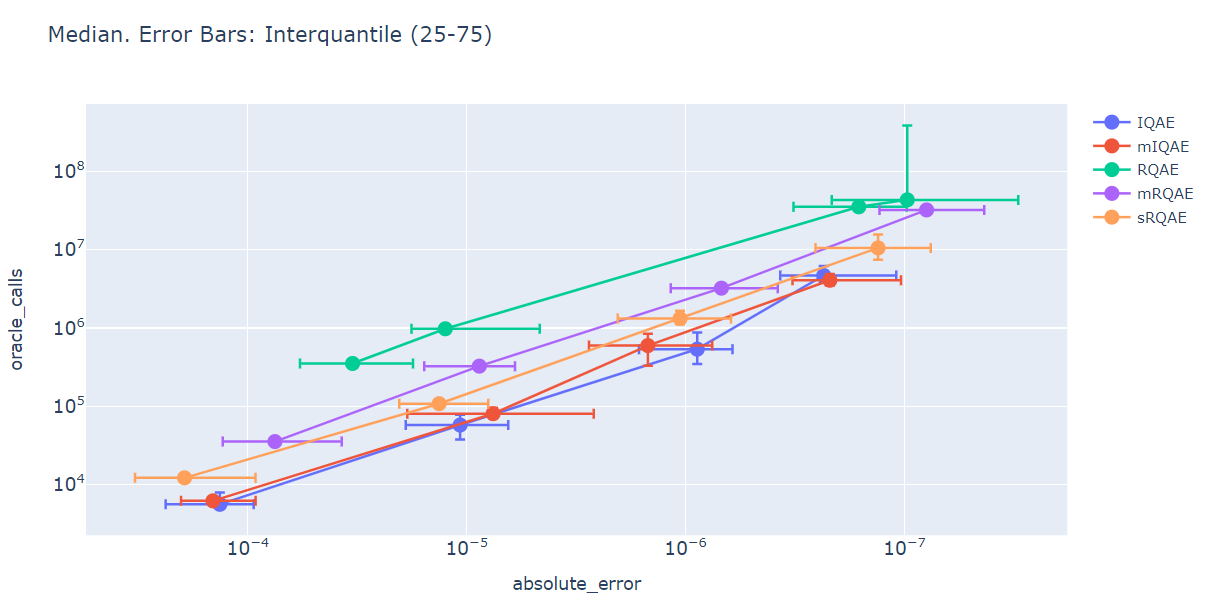

As can be seen the original **RQAE** has worse performance than **IQAE** or **mIQAE**. In the **mRQAE** the performance is creased over the **RQAE** but is slightly worse than **IQAE**s. The **sRQAE** has the best performance of all the **RQAE** methods and its performance is compatible with  **IQAE**s (is only little slightly worse)

In this graph, we present the medians over the 20 repetitions for each possible $\epsilon$ but in this case, the error bars present the difference between the minimum and the maximum value obtained (for **absolute_errror** and for **oracle_calls**). As can be seen, the **IQAE** presents the biggest error bars (related to outliers). 

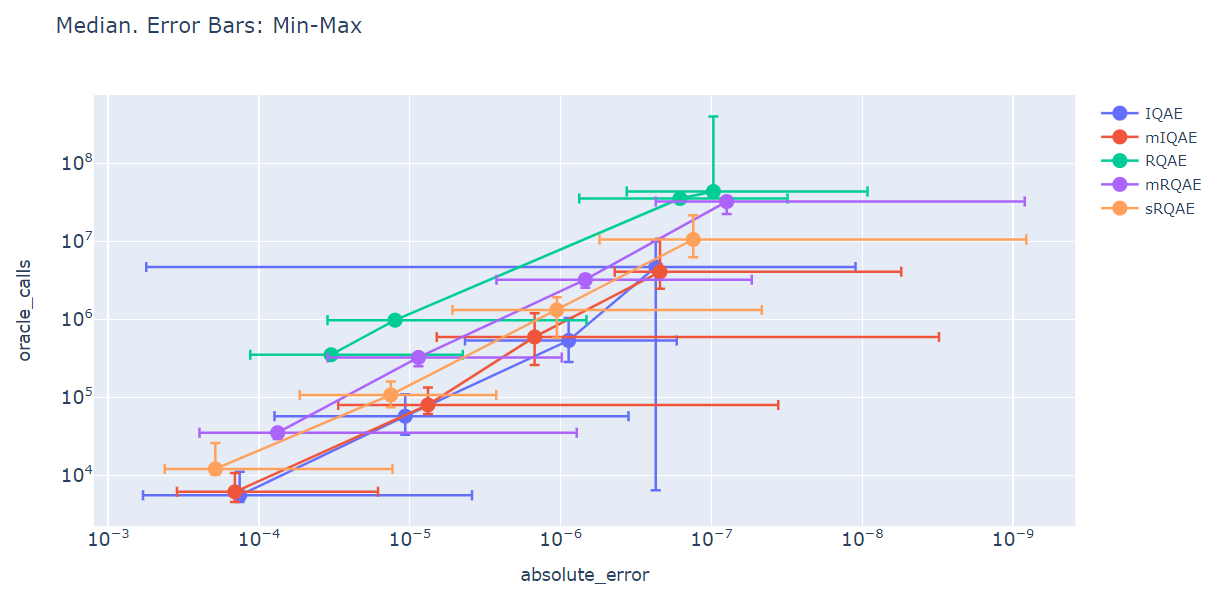



## 6.2 extended RQAE

For **eRQAE** the following configuration was used:

* sRQAE: $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]:
    * exp_const_10_None: exponential in q with *ratio_slope_k*=10 and constant in $\gamma$
    * exp_const_2_None: exponential in q with *ratio_slope_k*=2 and constant in $\gamma$
    * exp_const_5_None: exponential in q with *ratio_slope_k*=5 and constant in $\gamma$
    * exp_exp_2_-10: exponential in q with *ratio_slope_k*=2 and exponential in in $\gamma$ with *ratio_slope_gamma*=-10
    * exp_exp_2_-2: exponential in q with *ratio_slope_k*=2 and exponential in in $\gamma$ with *ratio_slope_gamma*=-2
    * exp_exp_2_-5: exponential in q with *ratio_slope_k*=2 and exponential in in $\gamma$ with *ratio_slope_gamma*=-5    
    * exp_exp_2_10: exponential in q with *ratio_slope_k*=2 and exponential in in $\gamma$ with *ratio_slope_gamma*=10 
    * exp_exp_2_2: exponential in q with *ratio_slope_k*=2 and exponential in in $\gamma$ with *ratio_slope_gamma*=2
    * exp_exp_2_5: exponential in q with *ratio_slope_k*=2 and exponential in in $\gamma$ with *ratio_slope_gamma*=5    
    * linear_const_10_None: linear in q with *ratio_slope_k*=10 and constant in $\gamma$
    * linear_const_2_None: linear in q with *ratio_slope_k*=2 and constant in $\gamma$    
    * linear_const_5_None: linear in q with *ratio_slope_k*=5 and constant  in $\gamma$     
    * linear_linear_2_10: linear in q with *ratio_slope_k*=2 and in linear in $\gamma$  with *ratio_slope_gamma*=10     
    * linear_linear_2_2: linear in q with *ratio_slope_k*=2 and in linear in $\gamma$  with *ratio_slope_gamma*=2  
    * linear_linear_2_5: linear in q with *ratio_slope_k*=2 and in linear in $\gamma$  with *ratio_slope_gamma*=5    
    
For each possible combination of $\epsilon$ and schedule 20 repetitions were done.


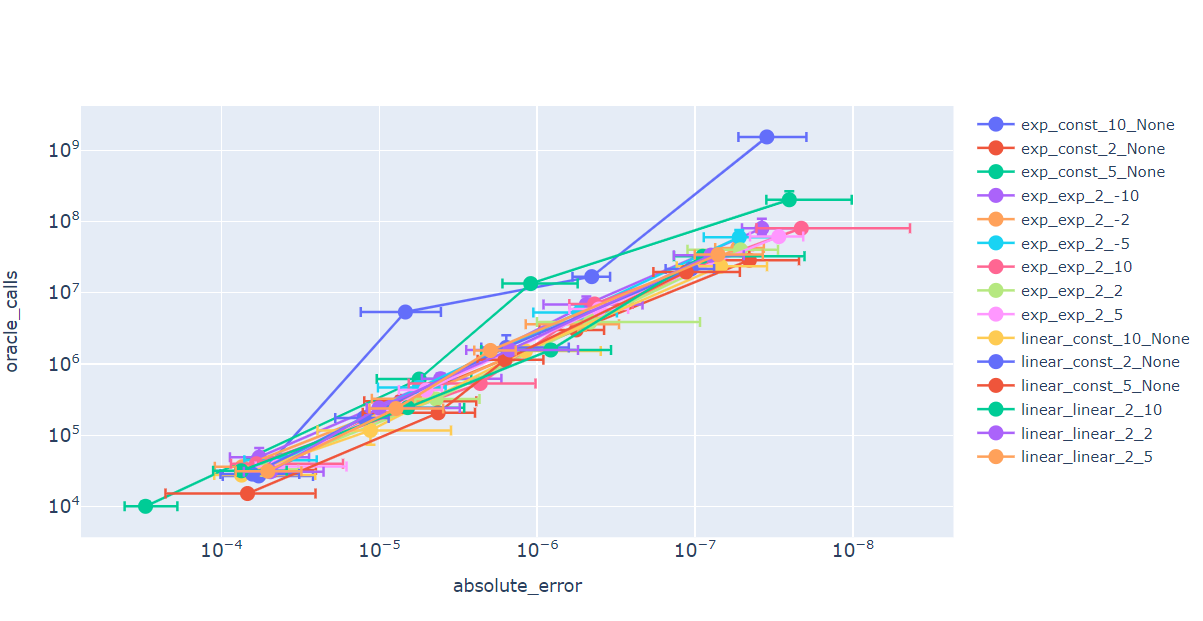


For most of the schedules, the performance is similar. Only for exponential schedules in k with high *ratio_slope_k* (10 and 5), the performance is much worse.

As can be seen in the following figure most of **eRQAE** schedules have a compatible performance with **mRQAE** or **sRQAE**


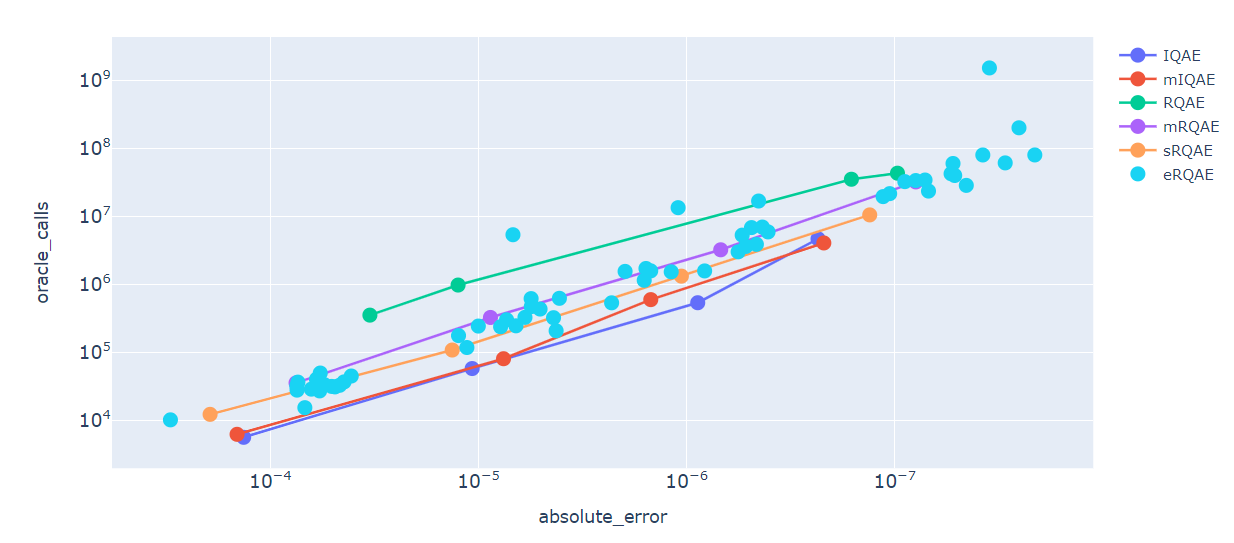